In [ ]:
import librosa
import soundfile as sf
import numpy as np
import os
import matplotlib.pyplot as plt


def extract_mfcc(file_path, n_mfcc=13, hop_length=512, n_fft=2048):
    # Load audio file using soundfile
    audio, sr = sf.read(file_path)

    # Extract MFCC features
    mfccs = librosa.feature.mfcc(
        y=audio, sr=sr, n_mfcc=n_mfcc, hop_length=hop_length, n_fft=n_fft
    )

    return mfccs


def process_timit_data(data_path, output_path):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    # Process each TIMIT file
    for root, dirs, files in os.walk(data_path):
        for file in files:
            if file.endswith(".WAV"):
                file_path = os.path.join(root, file)

                # Extract subfolder name from the TIMIT path
                subfolder_name = os.path.relpath(root, data_path)

                # Create subfolder in the output directory
                output_subfolder = os.path.join(output_path, subfolder_name)
                if not os.path.exists(output_subfolder):
                    os.makedirs(output_subfolder)

                # Extract MFCC features
                mfccs = extract_mfcc(file_path)

                # Save MFCC matrix in the subfolder
                output_file = os.path.join(
                    output_subfolder, os.path.splitext(file)[0] + "_mfcc.npy"
                )
                np.save(output_file, mfccs.T)

                print(f"Processed {file} and saved MFCC matrix to {output_file}")


if __name__ == "__main__":
    # Set the path to the TIMIT dataset and output directory
    timit_data_path = "./data/"
    output_directory = "./output/"

    process_timit_data(timit_data_path, output_directory)

MFCC Image Shape: (92, 13)


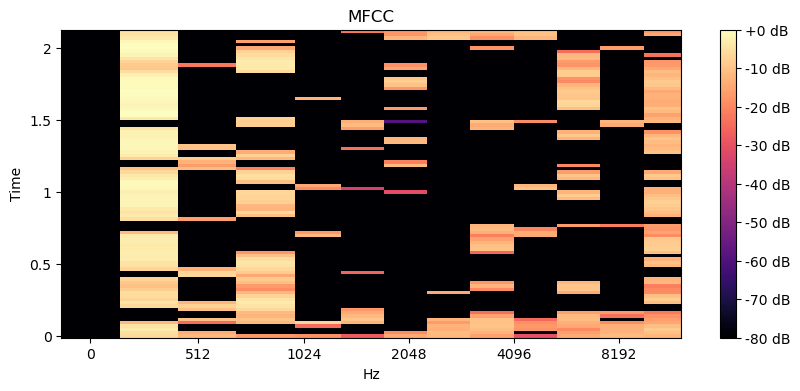

In [5]:
mfcc_image = np.load("./output/FCJF0/SA1_mfcc.npy")
print("MFCC Image Shape:", mfcc_image.shape)

# Display MFCC as an image
plt.figure(figsize=(10, 4))
librosa.display.specshow(
    librosa.power_to_db(mfcc_image, ref=np.max), y_axis="time", x_axis="mel"
)
plt.colorbar(format="%+2.0f dB")
plt.title("MFCC")
plt.show()